In [24]:
!pip install pandas=='1.3.4'

     |████████████████████████████████| 11.3 MB 6.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn

In [2]:
import pickle

In [3]:
!python -m pip install tslearn

In [9]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [11]:
decomposed_df_no_null = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/decomposed_df_no_null.csv')

In [12]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [22]:
ticker_order = list(decomposed_df_no_null.ticker.dropna().unique())
print(f"# of tickers = {len(ticker_order)}") # this should be 500 but is 497

# this list will be transformed
ts_data = []
for t in ticker_order:
    # shape is (118, 18)
    # converting numpy to list for tslearn
    ts_data.append(decomposed_df_no_null[decomposed_df_no_null.ticker ==t].iloc[:,2:].to_numpy())

# of tickers = 497


In [23]:
ts_X = to_time_series_dataset(ts_data) 

In [24]:
ts_X

array([[[ 5.09451530e-02, -6.30879268e-02, -1.04740784e-02, ...,
          3.25866958e-02, -5.22762463e-02, -1.38278132e-02],
        [ 4.63887243e-03, -6.95111349e-02, -1.67083244e-02, ...,
         -3.81475715e-02, -5.38284474e-02, -1.98759069e-02],
        [-4.30708526e-02, -7.91107740e-02, -2.18891567e-02, ...,
         -2.51172508e-02, -6.46049573e-02, -2.45355135e-02],
        ...,
        [ 8.85309168e-03,  6.14612040e-02,  2.30091497e-02, ...,
          3.77345708e-02,  4.95598864e-02,  4.67655121e-02],
        [ 7.65364677e-02,  5.20922474e-02,  2.38995600e-02, ...,
          7.40329682e-02,  3.82848630e-02,  4.45032853e-02],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 5.78188928e-02,  5.02389545e-02, -7.63659064e-02, ...,
          4.13172304e-02,  4.56327999e-02,  1.59668360e-02],
        [-1.54256966e-03,  5.00559567e-02, -8.78232057e-02, ...,
         -4.03737970e-02,  4.15399602e

In [29]:
#distortions = [] # this is for no-time
inertias = []
K = range(6, 25)
seed = 0
for k in K:
    # Building and fitting the model
    print(f"Clustering with {k}")
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=10, random_state=seed)
    #kmeanModel = KMeans(n_clusters=k).fit(X_transformed)
    kmeanModel.fit(ts_X)
    
    inertias.append(kmeanModel.inertia_)


Clustering with 6
Clustering with 7
Clustering with 8
Clustering with 9
Clustering with 10
Clustering with 11
Clustering with 12
Clustering with 13
Clustering with 14
Clustering with 15
Clustering with 16
Clustering with 17
Clustering with 18
Clustering with 19
Clustering with 20
Clustering with 21
Clustering with 22
Clustering with 23
Clustering with 24


In [33]:
import matplotlib.pyplot as plt

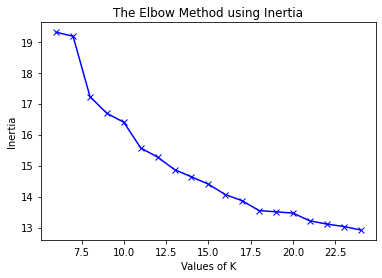

In [34]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [35]:
kmeanModel = TimeSeriesKMeans(n_clusters=20, metric="dtw", max_iter=10, random_state=seed)
kmeanModel.fit(ts_X)
labels = kmeanModel.predict(ts_X)

In [36]:
stock_clusters = pd.DataFrame(np.array([ticker_order,labels]).T, columns=['stock','cluster'])

In [37]:
stock_clusters

,stock,cluster
0,KR,2
1,AZO,2
2,COST,2
3,GS,4
4,BBY,1
...,...,...
492,MRNA,14
493,CARR,4
494,CTVA,15
495,OGN,15


In [39]:
stock_clusters.to_csv('/gdrive/MyDrive/Colab Notebooks/stock_clusters.csv')